- 서버에서 작업하여 colab 관련 코드는 모두 지웠습니다.
- 파일 다운로드는 터미널에서 진행하였고, 모든 데이터는 data directory 안에 모아두었습니다.

## Transcript count table 마련하기

제공된 alignment와 annotation 파일들을 이용해서 transcript별 read count를 구해봅니다. 실제 연구에서는 multi-mapping 등을 고려해야 하지만, 여기서는 단순화해서 모두 무시합니다. 데이터가 있는 곳으로 이동해서 작업합시다.

In [5]:
!featureCounts -T 20 -a data/gencode.gtf -o read-counts.txt data/*.bam  # 터미널에서 실행하였음

/bin/bash: featureCounts: command not found


결과를 pandas로 읽어와 봅니다.

In [9]:
import pandas as pd

cnts = pd.read_csv("read-counts.txt", sep="\t", comment="#", index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,data/CLIP-35L33G.bam,data/RNA-control.bam,data/RNA-siLin28a.bam,data/RNA-siLuc.bam,data/RPF-siLin28a.bam,data/RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


이제 한 번 대충 그림을 그려 봅니다.

In [11]:
cnts["clip_enrichment"] = cnts["data/CLIP-35L33G.bam"] / cnts["data/RNA-control.bam"]
cnts["rden_change"] = (
    cnts["data/RPF-siLin28a.bam"] / cnts["data/RNA-siLin28a.bam"]
) / (cnts["data/RPF-siLuc.bam"] / cnts["data/RNA-siLuc.bam"])
cnts.head()

,Chr,Start,End,Strand,Length,data/CLIP-35L33G.bam,data/RNA-control.bam,data/RNA-siLin28a.bam,data/RNA-siLuc.bam,data/RPF-siLin28a.bam,data/RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/data/project/danyoung/miniconda3/envs/binfo1/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


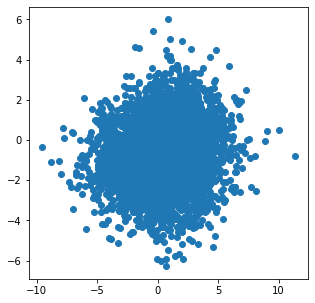

In [12]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts["clip_enrichment"]), np.log2(cnts["rden_change"]))

이 그림에는 문제가 많이 있습니다. 논문의 그림처럼 한 번 만들어 봅시다~

## Protein localization 반영하기

논문 그림에서는 protein localization을 반영해서 색으로 나타냈습니다. 이것을 한 번 구현해 봅시다. 각 gene product의 localization을 따로 구하려면 좀 귀찮기 때문에 미리 모아 두었습니다. UniProt에서 매핑된 데이터를 토대로 아주 명확한 것만 일부 정리한 것입니다. 이것도 마찬가지로 처음엔 에러가 나기도 하니까, 다시 실행해보면 거의 잘 됩니다~

In [50]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv(
    "https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt", sep="\t"
)
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


이제 이 localization 데이터와 위에서 만든 scatter를 결합해서 논문 그림과 비슷하게 만들어 봅시다.

In [51]:
cnts2 = pd.read_csv("read-counts.txt", sep="\t", comment="#", index_col=False)
cnts2["Geneid"] = cnts2["Geneid"].str.split(".").str[0]
cnts2 = cnts2.rename(columns={"Geneid": "gene_id"})
cnts2

,gene_id,Chr,Start,End,Strand,Length,data/CLIP-35L33G.bam,data/RNA-control.bam,data/RNA-siLin28a.bam,data/RNA-siLuc.bam,data/RPF-siLin28a.bam,data/RPF-siLuc.bam
0,ENSMUSG00000102693,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
1,ENSMUSG00000064842,chr1,3172239,3172348,+,110,0,0,0,0,0,0
2,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
3,ENSMUSG00000102851,chr1,3322980,3323459,+,480,3,0,0,0,0,0
4,ENSMUSG00000103377,chr1,3435954,3438772,-,2819,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842
55355,ENSMUSG00000064369,chrM,14071,14139,-,69,81,61,30,25,18,19
55356,ENSMUSG00000064370,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329
55357,ENSMUSG00000064371,chrM,15289,15355,+,67,185,10,15,25,5257,3947


In [52]:
df = pd.merge(cnts2, mouselocal, on="gene_id")
df["clip_enrichment"] = df["data/CLIP-35L33G.bam"] / df["data/RNA-control.bam"]
df["rden_change"] = (df["data/RPF-siLin28a.bam"] / df["data/RNA-siLin28a.bam"]) / (
    df["data/RPF-siLuc.bam"] / df["data/RNA-siLuc.bam"]
)
df["log2_clip_enrichment"] = np.log2(df["clip_enrichment"])
df["log2_rden_change"] = np.log2(df["rden_change"])
df

/data/project/danyoung/miniconda3/envs/binfo1/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/data/project/danyoung/miniconda3/envs/binfo1/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,gene_id,Chr,Start,End,Strand,Length,data/CLIP-35L33G.bam,data/RNA-control.bam,data/RNA-siLin28a.bam,data/RNA-siLuc.bam,data/RPF-siLin28a.bam,data/RPF-siLuc.bam,Gene names,type,clip_enrichment,rden_change,log2_clip_enrichment,log2_rden_change
0,ENSMUSG00000051951,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,Xkr4 Xrg4,integral membrane,4.000000,NaN,2.000000,NaN
1,ENSMUSG00000025902,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,Sox17 Sox-17,nucleus,6.000000,0.416667,2.584963,-1.263034
2,ENSMUSG00000025903,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4878011;4878046;4878053;4878119;4878121;487813...,4878205;4878205;4878205;4878205;4878205;487820...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,7145,2045,574,1219,1236,33,44,Lypla1 Apt1 Pla1a,cytoplasm,3.562718,0.760459,1.832978,-0.395057
3,ENSMUSG00000002459,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4979799;4979799;4980625;4980697;4982537;498253...,4980885;4980885;4980885;4980885;4982771;498277...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4239,5,1,1,8,3,2,Rgs20 Rgsz1,nucleus,5.000000,12.000000,2.321928,3.584963
4,ENSMUSG00000025905,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,5658689;5658716;5658716;5658780;5659164;565922...,5661534;5658886;5658886;5658886;5659528;565952...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+,9151,49,1,20,20,8,7,Oprk1,integral membrane,49.000000,1.142857,5.614710,0.192645
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9518,ENSMUSG00000064360,chrM,9459,9806,+,348,0,36,110,135,12,14,Mtnd3 mt-Nd3 Nd3,integral membrane,0.000000,1.051948,-inf,0.073063
9519,ENSMUSG00000065947,chrM,9877,10173,+,297,4,12,8,4,4,4,Mtnd4l mt-Nd4l Nd4l,integral membrane,0.333333,0.500000,-1.584963,-1.000000
9520,ENSMUSG00000064363,chrM,10167,11544,+,1378,373,2150,5028,4224,3292,2498,Mtnd4 mt-Nd4 Nd4,integral membrane,0.173488,1.107123,-2.527089,0.146816
9521,ENSMUSG00000064367,chrM,11742,13565,+,1824,3665,5281,15549,17408,5986,5305,Mtnd5 mt-Nd5 Nd5,integral membrane,0.693997,1.263275,-0.526998,0.337168


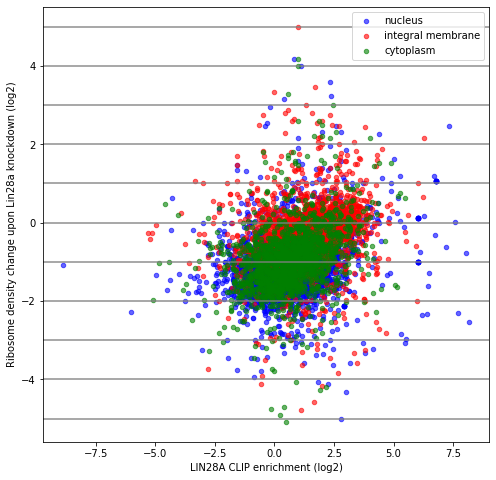

In [83]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

for t, c in zip(["nucleus", "integral membrane", "cytoplasm"], ["b", "r", "g"]):
    df_temp = df[df.type == t]
    df_temp.plot.scatter(
        x="log2_clip_enrichment",
        y="log2_rden_change",
        color=c,
        alpha=0.6,
        label=t,
        ax=ax,
    )
plt.legend()
ax.set_xlabel("LIN28A CLIP enrichment (log2)")
ax.set_ylabel("Ribosome density change upon Lin28a knockdown (log2)")
[ax.axhline(y=i, color="gray", alpha=0.9) for i in range(-5, 6)]